In [1]:
import numpy as np
from keras.models import load_model
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import sys
sys.setrecursionlimit(10**6) 
import matplotlib.pyplot as plt
sys.path.append('../BioExp')
from BioExp.helpers.metrics import *
from BioExp.helpers.losses import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples

Using TensorFlow backend.
/home/parth/miniconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/parth/miniconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/parth/miniconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/parth/miniconda3/envs/dl/l

## We need to check if the euclidian distance metric makes sense (https://bib.dbvis.de/uploadedFiles/155.pdf)


![pipeline](./imgs/distance.png)

In [2]:
import sanity_check

In [3]:
C = sanity_check.Cluster_Characteristics('/home/parth/Interpretable_ML/saved_models/model_flair_scaled/model-archi.h5', 'conv2d_15',
		weights = '/home/parth/Interpretable_ML/saved_models/model_flair_scaled/model-wts-flair.hdf5')

In [4]:
C.cluster(position=True, order = 2)

## To check whether clusters are well separated and dense, we use the Silhouette-Score. First, we cluster the weights using the L2 norm as above (the order parameter above is 2).

For n_clusters = 2 The average silhouette_score is : 0.013461938813831918


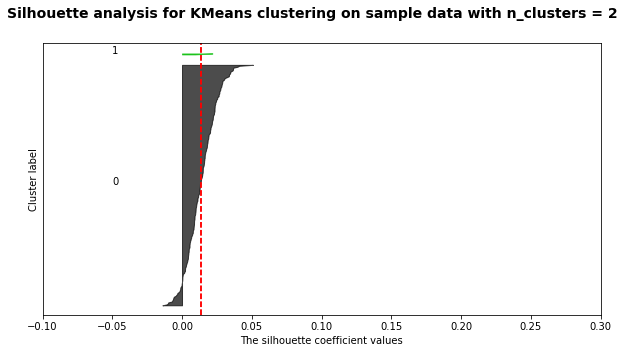

In [5]:
C.plot_silhouette(position=True)

## The above plot shows that for the n_cluster with highest average silhouette score, majority of samples are classified into one cluster. We try clustering with fractional order norms as described in the paper.

In [8]:
C.cluster(position=True, order = 0.1)

For n_clusters = 2 The average silhouette_score is : 0.01645865510543529


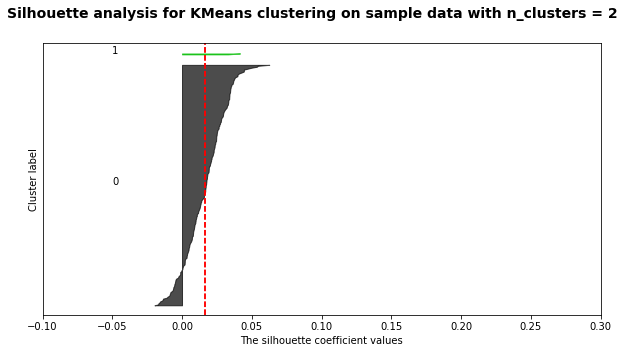

In [9]:
C.plot_silhouette(position=True)